In [1]:
import pandas as pd
import numpy as np

In [2]:
url=r"D:\cp\DataSet\Bengaluru_House_Data.csv"
df=pd.read_csv(url)

In [3]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Data Analysis

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Remove area type and society,balcony and availability

In [5]:
df.drop(columns=['area_type','society','availability','balcony'],inplace=True)

In [6]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df.dropna(subset=['location'],inplace=True)

In [9]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [10]:
def removeBHK(x):
    
    try:
        return int(x.split(" ")[0])
    
    except:
        return np.nan
            


In [11]:
df["size"]=df["size"].astype(str)
df['size']=df["size"].apply(removeBHK)

In [12]:
size_median=np.nanmedian(df['size'])

In [13]:
df['size'].fillna(size_median,inplace=True)

In [14]:
df['size']=df['size'].astype(int)

In [15]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [16]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [17]:
bath_median=np.nanmedian(df['bath'])

In [18]:
df['bath'].fillna(bath_median,inplace=True)

In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def clean_total_sqft(x):
    
    try:
        return float(x)
    except:
        try:
            x=x.split(' - ')
            return (float(x[0])+float(x[1]))//2
        except:
            np.nan

In [21]:
df['total_sqft']=df['total_sqft'].apply(clean_total_sqft)

In [22]:
df=df[~df['total_sqft'].isnull()]

In [23]:
df['total_sqft']=df['total_sqft'].astype(int)

C:\Users\91993\AppData\Local\Temp\ipykernel_13604\3314001130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].astype(int)


In [24]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [25]:
df['bath']=df['bath'].astype(int)

C:\Users\91993\AppData\Local\Temp\ipykernel_13604\3437949879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath']=df['bath'].astype(int)


In [26]:
df1=df.copy()

In [27]:
df1['price_per_sqft']=(df1.price/df.total_sqft*100000).round(0)

In [28]:
df1

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056,2,39.07,3700.0
1,Chikka Tirupathi,4,2600,5,120.00,4615.0
2,Uttarahalli,3,1440,2,62.00,4306.0
3,Lingadheeranahalli,3,1521,3,95.00,6246.0
4,Kothanur,2,1200,2,51.00,4250.0
...,...,...,...,...,...,...
13315,Whitefield,5,3453,4,231.00,6690.0
13316,Richards Town,4,3600,5,400.00,11111.0
13317,Raja Rajeshwari Nagar,2,1141,2,60.00,5259.0
13318,Padmanabhanagar,4,4689,4,488.00,10407.0


In [29]:
df1.location.unique().size

1299

In [30]:
df1.location=df1.location.apply(lambda x:x.strip())

In [31]:
stats=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
stats

location
Whitefield               539
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
Kanakapura Main Road       1
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1288, dtype: int64

In [32]:
location_lessthan_10=stats[stats<=10]

In [33]:
df1.location=df1.location.apply(lambda x:'other' if x in location_lessthan_10 else x)

In [34]:
df1.location.unique().size

241

In [35]:
df1[df1.location=='other']

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020,6,370.00,36275.0
18,other,3,2770,4,290.00,10469.0
19,other,2,1100,2,48.00,4364.0
25,other,3,1250,3,56.00,4480.0
42,other,1,600,1,38.00,6333.0
...,...,...,...,...,...,...
13291,other,1,812,1,26.00,3202.0
13292,other,3,1440,2,63.93,4440.0
13302,other,2,1075,2,48.00,4465.0
13306,other,4,1200,5,325.00,27083.0


In [36]:
df1['sqft_per_room']=(df1.total_sqft/df1['size']).round()

In [37]:
df1

,location,size,total_sqft,bath,price,price_per_sqft,sqft_per_room
0,Electronic City Phase II,2,1056,2,39.07,3700.0,528.0
1,Chikka Tirupathi,4,2600,5,120.00,4615.0,650.0
2,Uttarahalli,3,1440,2,62.00,4306.0,480.0
3,Lingadheeranahalli,3,1521,3,95.00,6246.0,507.0
4,Kothanur,2,1200,2,51.00,4250.0,600.0
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453,4,231.00,6690.0,691.0
13316,other,4,3600,5,400.00,11111.0,900.0
13317,Raja Rajeshwari Nagar,2,1141,2,60.00,5259.0,570.0
13318,Padmanabhanagar,4,4689,4,488.00,10407.0,1172.0


In [38]:
df1[df1.sqft_per_room<300]

,location,size,total_sqft,bath,price,price_per_sqft,sqft_per_room
9,other,6,1020,6,370.0,36275.0,170.0
45,HSR Layout,8,600,9,200.0,33333.0,75.0
58,Murugeshpalya,6,1407,4,150.0,10661.0,234.0
68,Devarachikkanahalli,8,1350,7,85.0,6296.0,169.0
70,other,3,500,3,100.0,20000.0,167.0
...,...,...,...,...,...,...,...
13277,other,7,1400,7,218.0,15571.0,200.0
13279,other,6,1200,5,130.0,10833.0,200.0
13281,Margondanahalli,5,1375,5,125.0,9091.0,275.0
13303,Vidyaranyapura,5,774,5,70.0,9044.0,155.0


In [39]:
df1.shape

(13273, 7)

###### REMOVE DATA WHOSE SQFT AREA PER BEDROOM<300

In [40]:
df2=df1[df1.sqft_per_room>=300]

In [41]:
df2

,location,size,total_sqft,bath,price,price_per_sqft,sqft_per_room
0,Electronic City Phase II,2,1056,2,39.07,3700.0,528.0
1,Chikka Tirupathi,4,2600,5,120.00,4615.0,650.0
2,Uttarahalli,3,1440,2,62.00,4306.0,480.0
3,Lingadheeranahalli,3,1521,3,95.00,6246.0,507.0
4,Kothanur,2,1200,2,51.00,4250.0,600.0
...,...,...,...,...,...,...,...
13315,Whitefield,5,3453,4,231.00,6690.0,691.0
13316,other,4,3600,5,400.00,11111.0,900.0
13317,Raja Rajeshwari Nagar,2,1141,2,60.00,5259.0,570.0
13318,Padmanabhanagar,4,4689,4,488.00,10407.0,1172.0


In [42]:
df2.price_per_sqft.describe()

count     12530.000000
mean       6304.023144
std        4162.242922
min         268.000000
25%        4211.000000
50%        5294.000000
75%        6917.000000
max      176471.000000
Name: price_per_sqft, dtype: float64

In [43]:
def remove_beyond_1sd(group):
    
    out=pd.DataFrame()
    for key,value in group:
        
        
        mean=np.mean(value.price_per_sqft)
        SD=np.std(value.price_per_sqft)

        tem=value[(value.price_per_sqft>(mean-SD)) & (value.price_per_sqft<(mean+SD))]
        out=pd.concat([out,tem],ignore_index=True)
    return out 

In [44]:
group=df2.groupby(df2.location)

In [45]:
df3=remove_beyond_1sd(group)

In [46]:
df3

,location,size,total_sqft,bath,price,price_per_sqft,sqft_per_room
0,1st Block Jayanagar,4,2850,4,428.00,15018.0,712.0
1,1st Block Jayanagar,3,1630,3,194.00,11902.0,543.0
2,1st Block Jayanagar,3,1875,2,235.00,12533.0,625.0
3,1st Block Jayanagar,3,1200,2,130.00,10833.0,400.0
4,1st Block Jayanagar,2,1235,2,148.00,11984.0,618.0
...,...,...,...,...,...,...,...
10297,other,2,1353,2,110.00,8130.0,676.0
10298,other,1,812,1,26.00,3202.0,812.0
10299,other,3,1440,2,63.93,4440.0,480.0
10300,other,2,1075,2,48.00,4465.0,538.0


([<matplotlib.axis.XTick at 0x14ab747f2b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

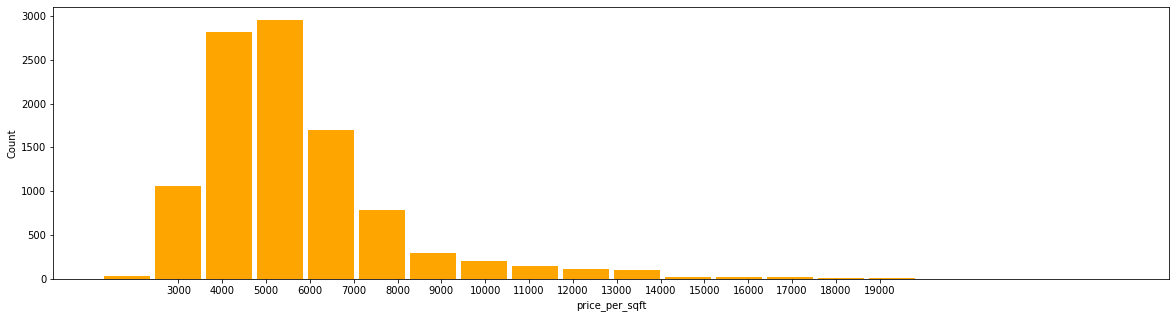

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.hist(df3.price_per_sqft,rwidth=0.9,color='orange',bins=20)

plt.xlabel("price_per_sqft")
plt.ylabel('Count')
plt.xticks(np.arange(3000,20000,1000))


In [48]:
df4=df3[(df3['size']+1)>=df3.bath]

In [49]:
df4

,location,size,total_sqft,bath,price,price_per_sqft,sqft_per_room
0,1st Block Jayanagar,4,2850,4,428.00,15018.0,712.0
1,1st Block Jayanagar,3,1630,3,194.00,11902.0,543.0
2,1st Block Jayanagar,3,1875,2,235.00,12533.0,625.0
3,1st Block Jayanagar,3,1200,2,130.00,10833.0,400.0
4,1st Block Jayanagar,2,1235,2,148.00,11984.0,618.0
...,...,...,...,...,...,...,...
10297,other,2,1353,2,110.00,8130.0,676.0
10298,other,1,812,1,26.00,3202.0,812.0
10299,other,3,1440,2,63.93,4440.0,480.0
10300,other,2,1075,2,48.00,4465.0,538.0


In [50]:
dummies_column=pd.get_dummies(df4.location)
dummies_column

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df5=pd.concat([df4,dummies_column],axis=1)


In [52]:
df5.shape

(10207, 248)

In [53]:
df6=df5.drop(['location','other','price_per_sqft','sqft_per_room'],axis=1)

In [54]:
df6.shape

(10207, 244)

In [55]:
df6

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850,4,428.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630,3,194.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875,2,235.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200,2,130.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235,2,148.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,2,1353,2,110.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10298,1,812,1,26.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10299,3,1440,2,63.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10300,2,1075,2,48.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [57]:
x=df6.drop(['price'],axis=1)
y=df6.price
test_data=x

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [59]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [60]:
model.score(x_train,y_train)

0.8048080957290298

In [61]:
model.score(x_test,y_test)

0.8486746183812904

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train,y_train)

array([0.74940249, 0.77726279, 0.80119688, 0.80299619, 0.78737678])

In [63]:
def predict_price(location,bhk,total_sqft,bath):
    
    arr=np.zeros(len(test_data.columns))
    arr[0]=bhk
    arr[1]=total_sqft
    arr[2]=bath
    
    index=np.where(test_data.columns==location.strip())[0][0]
    
    if index>=0:
        arr[index]=1
        

   
    return model.predict([arr])[0].round(3)
    
    

In [64]:
predict_price('1st Phase JP Nagar',2,1000,2)

C:\Users\91993\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.728

In [65]:
import pickle
with open('bangalorea_house_prices.pickle','wb') as f:
    pickle.dump(model,f)

In [66]:
import json

In [67]:
columns={'data_columns':[col.lower() for col in test_data.columns]}

In [68]:
with open ('column.json','w') as f:
    json.dump(columns,f)